<a href="https://colab.research.google.com/github/dileep1404/housepriceprediction/blob/main/HousePricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
d = pd.read_csv('https://raw.githubusercontent.com/Vaishnavi261/housing/main/Housing%20Dataset.csv')
d

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#by (replace) we are changing the values of object to int
d = d.replace({'mainroad':{'yes':1,'no':0}})
d = d.replace({'guestroom':{'yes':1,'no':0}})
d = d.replace({'basement':{'yes':1,'no':0}})
d = d.replace({'hotwaterheating':{'yes':1,'no':0}})
d = d.replace({'airconditioning':{'yes':1,'no':0}})
d = d.replace({'prefarea':{'yes':1,'no':0}})
d = d.replace({'furnishingstatus':{'furnished':1,'unfurnished':0,'semi-furnished':2}})
d

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [ ]:
d.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
#All the ATRIBUTES are taken to list, so we can slice the features and target variable(price)
f = ['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking'
      ,'prefarea','furnishingstatus']
d = d[f]

In [ ]:
d.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
#slicing for the x and y axis as(independent var and dependent var)
x = d[f[1:]]
y = d['price']

In [ ]:
#now spliting the dataset for testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 12)
(109, 12)
(436,)
(109,)


In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)

[2.37359519e+02 7.42382082e+04 1.09878563e+06 4.22818367e+05
 3.99602240e+05 2.36368961e+05 4.13764911e+05 6.96228583e+05
 8.14587673e+05 2.37846833e+05 6.34405791e+05 1.26914419e+05]


In [ ]:
y_test_predict = model.predict(x_test)
print(y_test_predict.shape)

(109,)


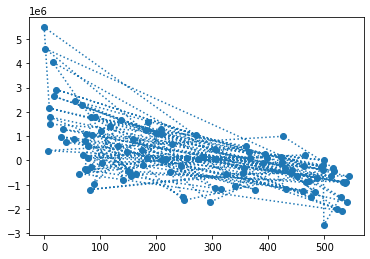

In [ ]:
g=plt.plot((y_test - y_test_predict),marker='o',linestyle='dotted')

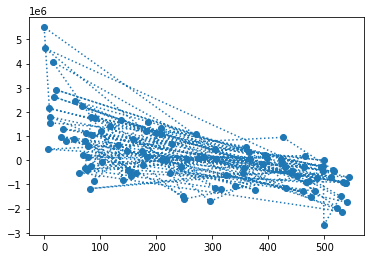

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(x_train,y_train)
y_test_predict = model.predict(x_test)
g=plt.plot((y_test - y_test_predict),marker='o',linestyle='dotted')

In [ ]:
r2_score(y_test, y_test_predict)

0.6516145300466903

In [ ]:
from sklearn import ensemble
new = ensemble.GradientBoostingRegressor()

In [ ]:
new.fit(x_train, y_train)
y_test_predict = model.predict(x_test)

In [ ]:
new.score(x_test,y_test_predict)

0.7926088349516114

In [ ]:
x_train.ndim

2

In [ ]:
y_test.ndim

1

In [ ]:
y_test_predict.ndim

1

In [ ]:
y_test = np.array([y_test])

In [ ]:
y_test.ndim

2

In [ ]:
y_test_predict = np.array([y_test_predict])

In [ ]:
y_test_predict.ndim

2

In [ ]:
x_test.ndim

2

In [ ]:
new.score(x_test,y_test_predict)

0.7926088349516114